## library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller


## function

In [2]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    # H0 : Data isnt stationary
    # H1 : Data is stationary

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [21]:
def std_anom(data,p,title):    
    data_anom = data.resample(p).sum()
    # Removing datum if datum = 0
    data_anom = data_anom[(data_anom != 0).all(1)]
    win_std = []
    for date in data_anom.index:
        #get the window ending at this data point
        window = data_anom.loc[:date].std()
        #get the deviation within this window
        win_std.append(window)

    rolling_deviations = pd.DataFrame(dtype=float, index = data_anom.index)
    rolling_deviations['std'] = win_std
    diff_rolling_deviations = rolling_deviations['std'].diff()
    diff_rolling_deviations = diff_rolling_deviations.dropna()
    plt.figure(figsize=(10,4))
    plt.plot(diff_rolling_deviations)
    plt.title(f'Deviation Differences: {title}', fontsize=20)
    plt.ylabel(title, fontsize=16)
    for year in range(2022,2023):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [51]:
def eda(data):
    cols = data.columns
    for i in cols : 
        data[i].plot(figsize=(20,4),linestyle='-',marker='.')
        plt.title(i)
        plt.ylabel(i)
        plt.xlabel("Datetime")
        plt.show()

## EX42

In [4]:
ritase_ex42 = pd.read_csv('/Users/abilfad/Desktop/hrs data case/Data Fuel Share/data/extracted_ritase/append_EX42.csv',index_col='waktu')
ritase_ex42.index = pd.to_datetime(ritase_ex42.index)
ritase_ex42['production'] = 43*ritase_ex42.value
ritase_ex42['working_hour'] = ritase_ex42.value.copy()
ritase_ex42['working_hour']=ritase_ex42['working_hour'].apply(lambda x : 1 if x > 0 else 0)


In [38]:
ritase_ex42_day = ritase_ex42.resample('D').sum()
ritase_ex42_day['product_per_hour'] = ritase_ex42_day['production'] / ritase_ex42_day.working_hour
ritase_ex42_day

,value,production,working_hour,product_per_hour
waktu,,,,
2022-01-01,0.0,0.0,0,NaN
2022-01-02,186.0,7998.0,22,363.545455
2022-01-03,114.0,4902.0,17,288.352941
2022-01-04,187.0,8041.0,20,402.050000
2022-01-05,140.0,6020.0,17,354.117647
...,...,...,...,...
2022-12-28,273.0,11739.0,22,533.590909
2022-12-29,184.0,7912.0,21,376.761905
2022-12-30,287.0,12341.0,22,560.954545


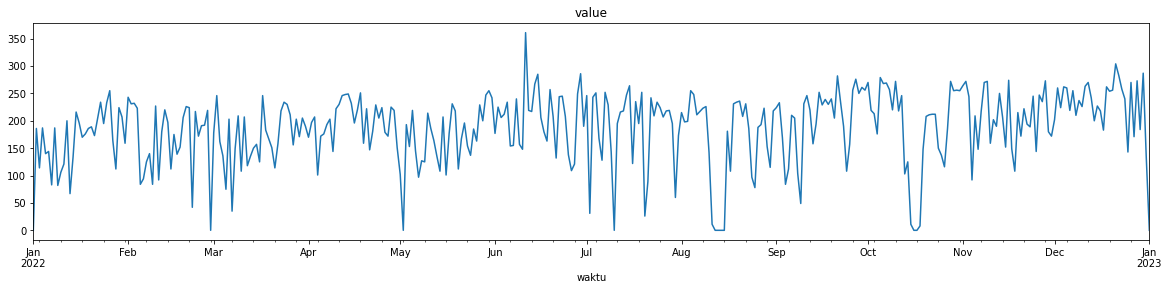

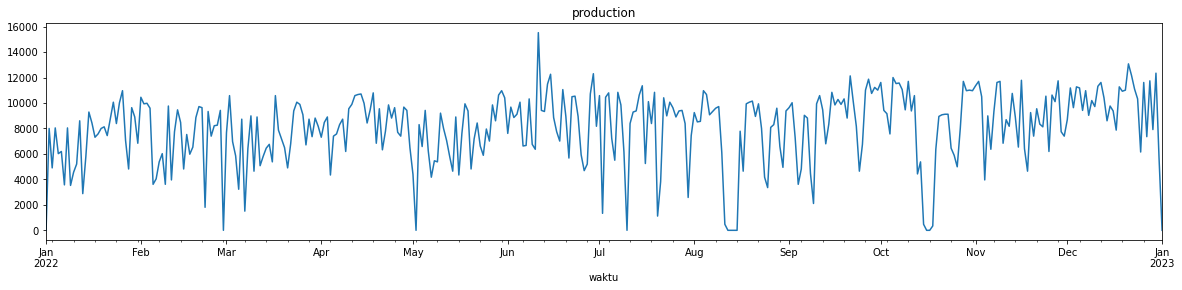

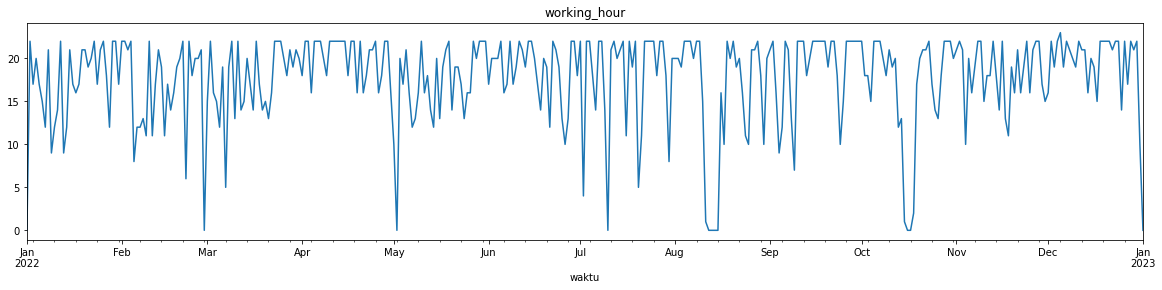

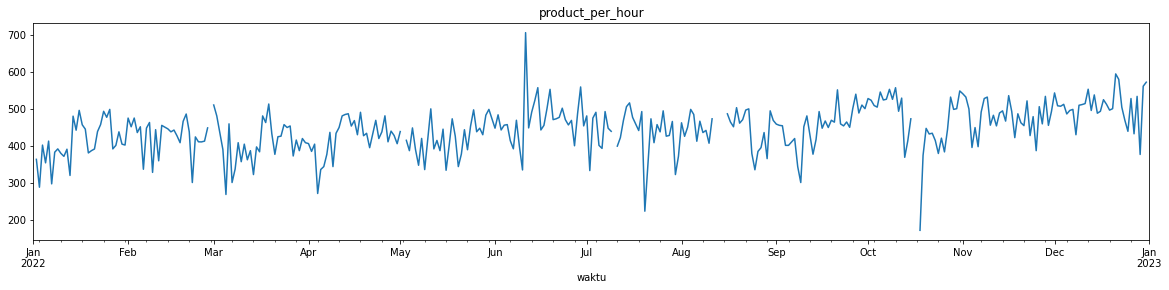

In [40]:
cols = ritase_ex42_day.columns
for i in cols : 
    ritase_ex42_day[i].plot(figsize=(20,4))
    plt.title(i)
    plt.show()

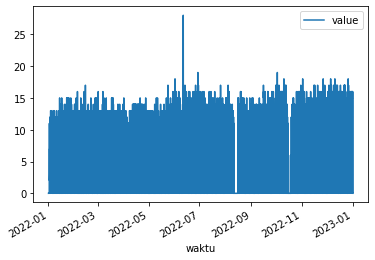

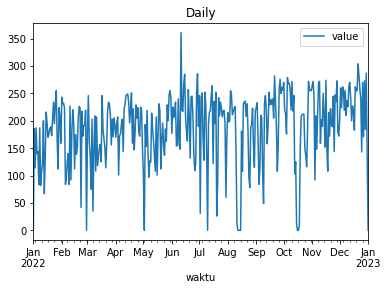

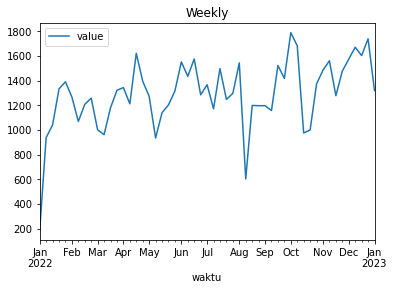

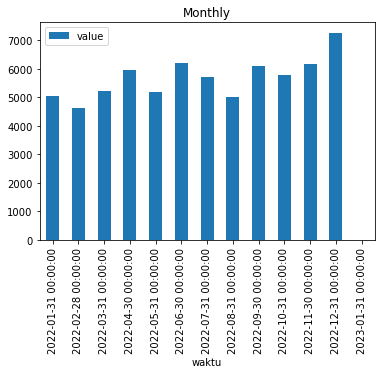

In [6]:

ritase_ex42.plot(y='value')
ritase_ex42.resample('D').sum().plot(y='value',title="Daily")
ritase_ex42.resample('W').sum().plot(y='value',title="Weekly")
ritase_ex42.resample('M').sum().plot(y='value',kind='bar',title="Monthly")

Analisis : 
- Terdapat hari dan jam dimana tidak ada kegiatan operational
- Jika diamati dengan tingkat kepresisian jam dan hari, maka data dapat dinilai sebagai data yang stationary (akan dibuktikan secara rigor nanti)
- Jika diamati dengan tingkat kepresisian mingguan dan bulanan, data terkesan memiliki trend positif, maka data dapat dinilai sebagai data yang tidak stationery (akan dibuktikan secara rigor nanti)


Diagnostic test

In [7]:
data = [ritase_ex42.value,ritase_ex42.value.resample('D').sum(),ritase_ex42.value.resample('D').sum(),ritase_ex42.value.resample('W').sum(),ritase_ex42.value.resample('M').sum()]
title = ['Hourly','Daily','Weekly','Month']
for i in range(4):
    adf_test(data[i],title=title[i])

Augmented Dickey-Fuller Test: Hourly
ADF test statistic     -1.051372e+01
p-value                 1.008997e-18
# lags used             3.600000e+01
# observations          8.723000e+03
critical value (1%)    -3.431100e+00
critical value (5%)    -2.861871e+00
critical value (10%)   -2.566946e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Daily
ADF test statistic     -9.266849e+00
p-value                 1.359688e-15
# lags used             1.000000e+00
# observations          3.640000e+02
critical value (1%)    -3.448443e+00
critical value (5%)    -2.869513e+00
critical value (10%)   -2.571018e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Weekly
ADF test statistic     -9.266849e+00
p-value                 1.359688e-15
# lags used             1.000000e+00
# observations          3.640000e+02
cr

didapat dari uji diagnostik adf test, dapat disumpulkan untuk data dengan kepresisian dari jam ke bulanan, data bersifat stationer. artinya kita dapat memandang masalah ini sebagai masalah timeseries.

Anomaly Detection

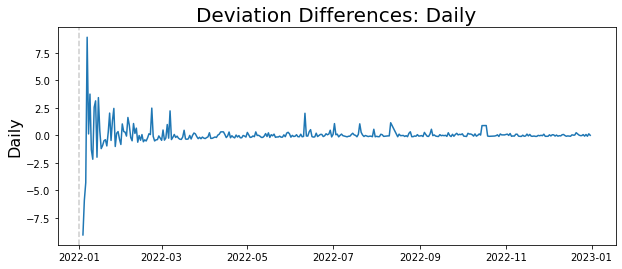

In [30]:
std_anom(ritase_ex42[['value']],'D','Daily')

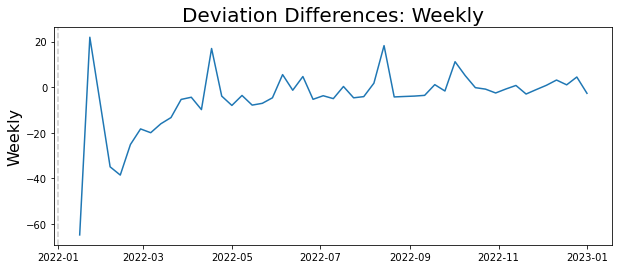

In [36]:
std_anom(ritase_ex42[['value']],'W','Weekly')

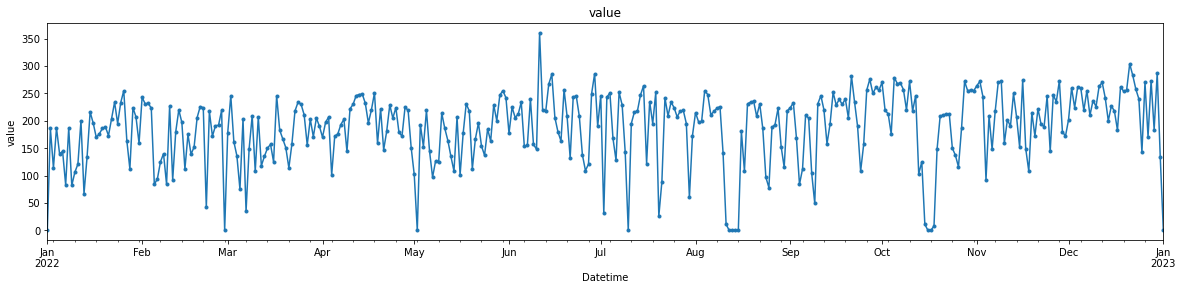

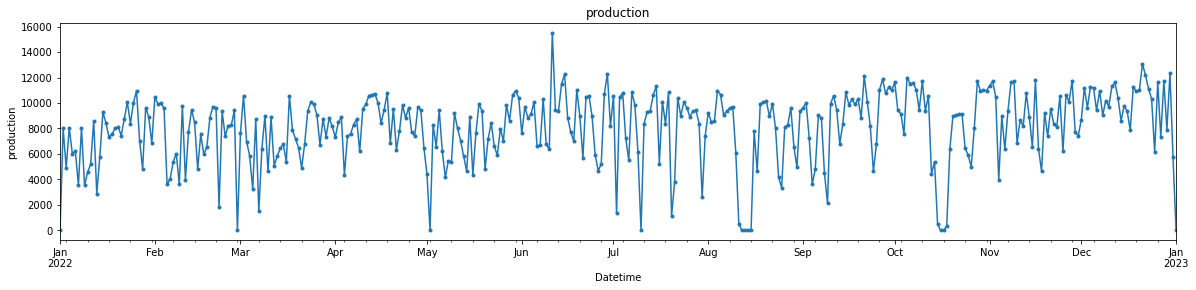

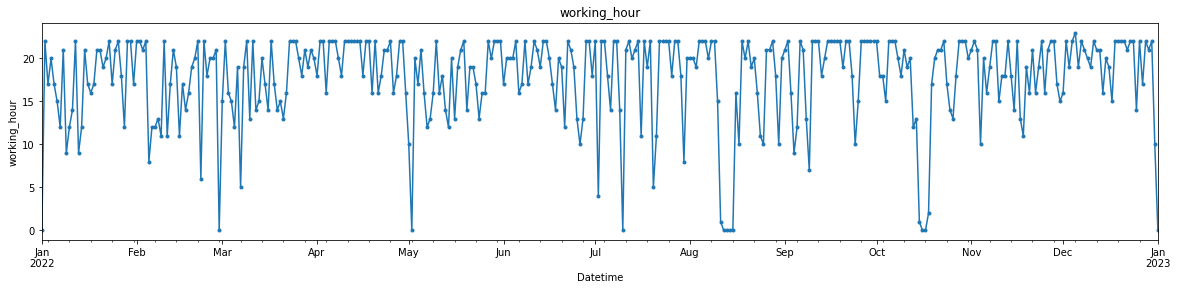

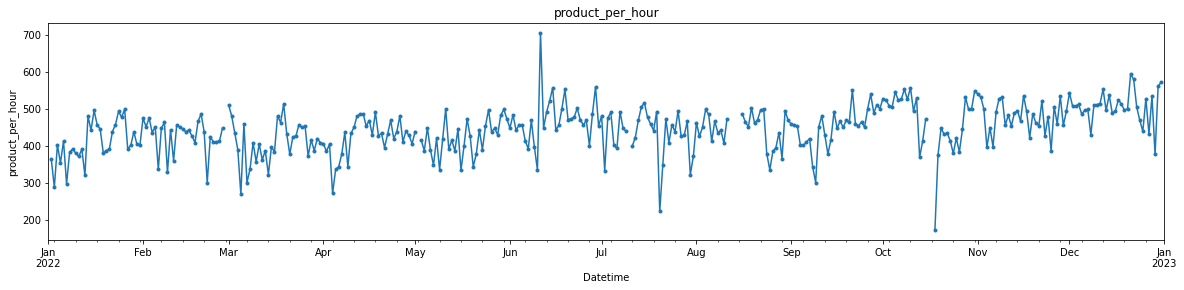

In [52]:
eda(ritase_ex42_day)

## EX44

In [10]:
ritase_ex44 = pd.read_csv('/Users/abilfad/Desktop/hrs data case/Data Fuel Share/data/extracted_ritase/append_EX44.csv',index_col='waktu')

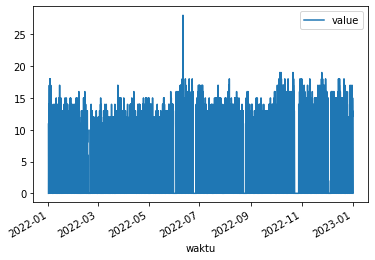

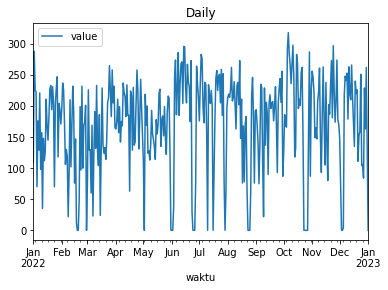

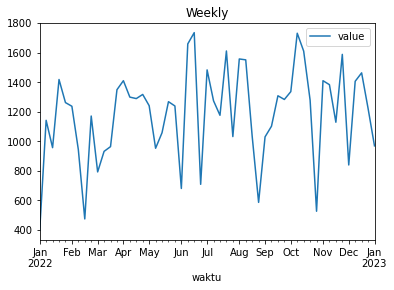

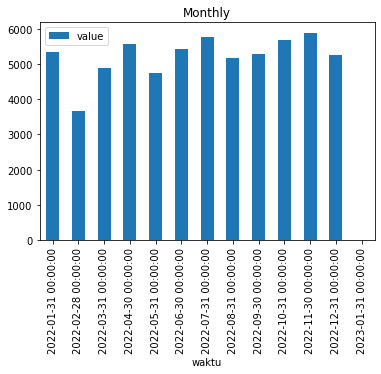

In [11]:
ritase_ex44.index = pd.to_datetime(ritase_ex44.index)
ritase_ex44.plot()
ritase_ex44.resample('D').sum().plot(title="Daily")
ritase_ex44.resample('W').sum().plot(title="Weekly")
ritase_ex44.resample('M').sum().plot(kind='bar',title="Monthly")

Analisis : 
- Terdapat hari dan jam dimana proses operational tidak terjadi, ditandai dengan jumlah ritase perjam dan harinya berjumlah 0
- Jika data diamati dengan segala tingkat kepresisian, maka data terlihat stationer, artinya data tidak mengandung trend dan musiman (akan dibuktikan secara rigor)


Diagnostic Test

In [12]:
data = [ritase_ex44,ritase_ex44.resample('D').sum(),ritase_ex44.resample('D').sum(),ritase_ex44.resample('W').sum(),ritase_ex44.resample('M').sum()]
title = ['Hourly','Daily','Weekly','Month']
for i in range(4):
    adf_test(data[i],title=title[i])

Augmented Dickey-Fuller Test: Hourly
ADF test statistic     -9.621986e+00
p-value                 1.699397e-16
# lags used             3.600000e+01
# observations          8.747000e+03
critical value (1%)    -3.431098e+00
critical value (5%)    -2.861870e+00
critical value (10%)   -2.566946e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Daily
ADF test statistic     -1.149874e+01
p-value                 4.546275e-21
# lags used             0.000000e+00
# observations          3.650000e+02
critical value (1%)    -3.448394e+00
critical value (5%)    -2.869491e+00
critical value (10%)   -2.571006e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Weekly
ADF test statistic     -1.149874e+01
p-value                 4.546275e-21
# lags used             0.000000e+00
# observations          3.650000e+02
cr

Analisis : 
- Dapat dianalisis bahwa data dengan segala kepresisian tidak mengandung tren dan musiman. Oleh karena itu kita bisa dapat menyimpulkan bahwa datanya stationer, sehingga kita dapat memodel masalah ini sebagai masalah timeseries

Anomaly Detection :

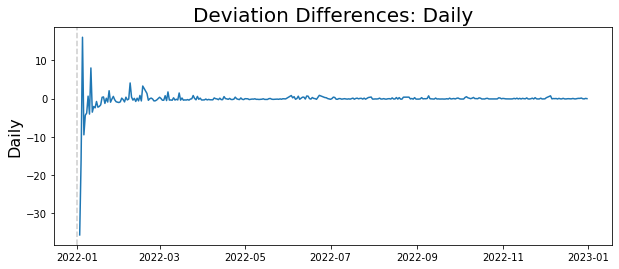

In [24]:
std_anom(ritase_ex44,'D','Daily')